<a href="https://colab.research.google.com/github/aquib1011/Stock_Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/^NSEI.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4855.700195,4481.549805,4837.549805,4837.549805,0
1,2007-09-24,4837.149902,5055.799805,4837.149902,5021.350098,5021.350098,0
2,2007-10-01,5021.500000,5261.350098,5001.350098,5185.850098,5185.850098,0
3,2007-10-08,5186.250000,5549.299805,5000.950195,5428.250000,5428.250000,0
4,2007-10-15,5428.350098,5736.799805,5101.750000,5215.299805,5215.299805,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       667 non-null    object 
 1   Open       667 non-null    float64
 2   High       667 non-null    float64
 3   Low        667 non-null    float64
 4   Close      667 non-null    float64
 5   Adj Close  667 non-null    float64
 6   Volume     667 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 36.6+ KB


In [5]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df = df.sort_values('Date')

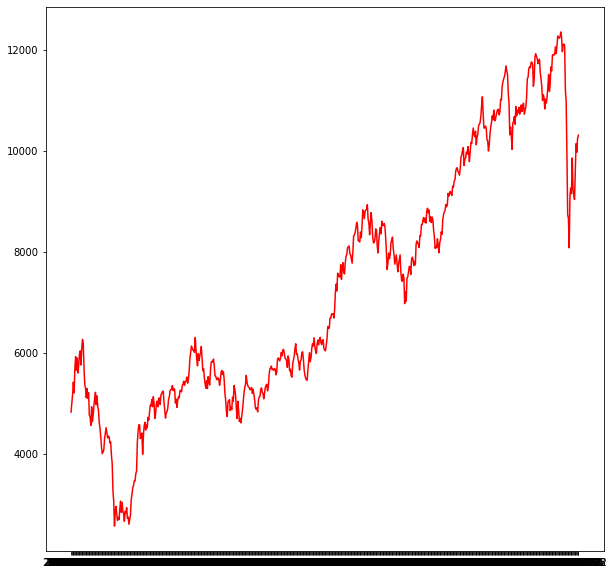

In [7]:
plt.figure(figsize =  (10,10))
plt.plot(df['Date'],df['Adj Close'],color='red')

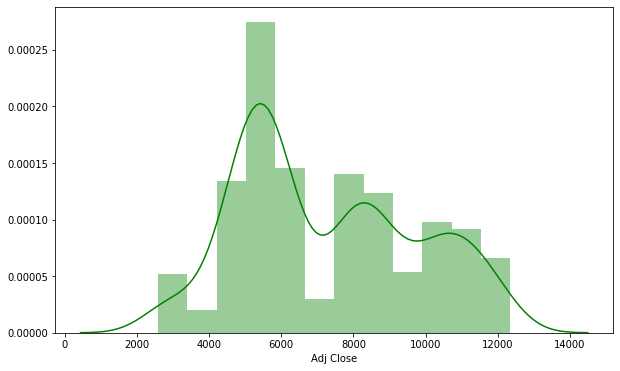

In [8]:
plt.figure(figsize = (10,6))
sns.distplot(df['Adj Close'], color = 'green')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


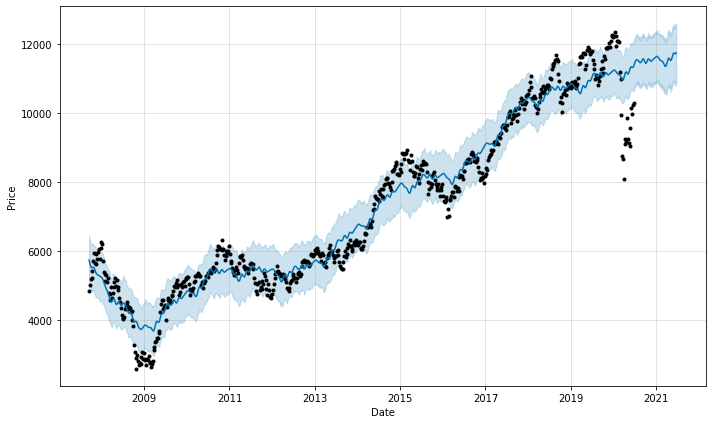

In [9]:
df = df.rename(index=str, columns={"Date": "ds", "Adj Close": "y"})
Predictions = Prophet()
Predictions.fit(df)
future = Predictions.make_future_dataframe(periods=365)
forecast = Predictions.predict(future)
Predictions.plot(forecast,xlabel='Date', ylabel='Price')
plt.show()

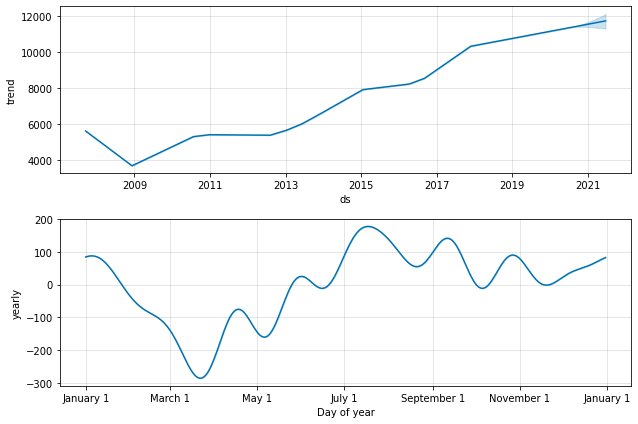

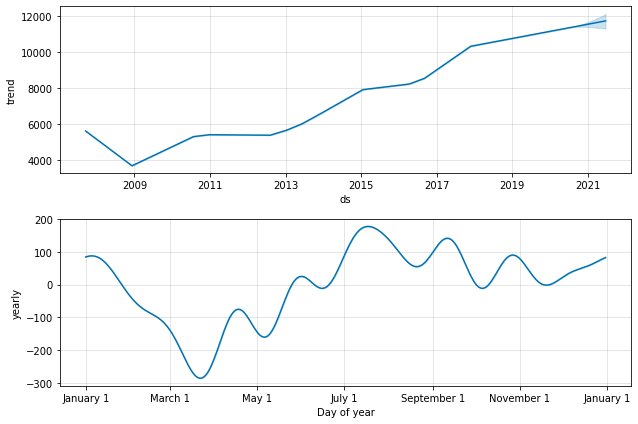

In [10]:
Predictions.plot_components(forecast)

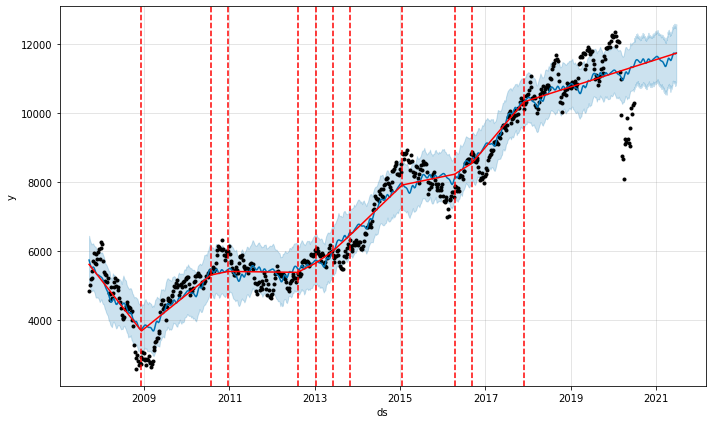

In [11]:
from fbprophet.plot import add_changepoints_to_plot
fig = Predictions.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),Predictions, forecast)